<a href="https://colab.research.google.com/github/Corry-Grodek/DataScience/blob/main/CorrGrodU6Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beans!

In [1]:
#Import libraries
!pip install git+https://github.com/pydata/xarray.git
import xarray as xr
!pip install bambi
import bambi as bmb

import numpy as np
import seaborn as sns
import pandas as pd
import arviz as az
import xarray as xr
import pymc as pm

from matplotlib import pyplot as plt

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-4zuh1e6k
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-4zuh1e6k
  Resolved https://github.com/pydata/xarray.git to commit c25215299c02cd36781cf3aa38e8583d1fe14849
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.3.dev1+gc2521529-py3-none-any.whl size=1247984 sha256=015841cf8c749ebbf9bba6f64fa1c45c2eb5f383049c8e0091ce54cb5d81d318
  Stored in directory: /tmp/pip-ephem-wheel-cache-na8qym2p/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.1
    Uninstalling xarray-2025.1.1:
      Successfully uninstalled xarray-2025.1.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 8.9 MB/s eta 0:00:00
   ━━

**For this project I wanted to do something related to agriculture because it felt like a useful application of data science, but mostly because it seemed fun. I found my data on Data.gov, this data set was a from a study that includeddata from a spectroradiometer, satelite camera information, and in-situ (measured on-site) biological measurements. I wanted to be able to predict the dry weight, or yield, of crop based on the data I had access to.**

Original data source below

https://catalog.data.gov/dataset/legume-hyperspectral-and-iin-situ-i-biophysical-biochemical-dataset-collected-in-the-south

# Looking at the data

In [2]:
#import full data set
beansFULL = pd.read_csv('https://ndownloader.figshare.com/files/50659254',dtype={'Species':'category'}).dropna()
beansFULL.dropna()

,Plot ID,Days After Planting,Measure Date,Species,Row Spacing,NDF,ADF,IVTD,CP,Canopy Cover,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,MG1,41,7/27/2018,Mothbean,15,30.734,22.837,87.983,25.55,18.99,...,0.034000,0.014200,-0.001240,-0.029820,-0.032200,-0.006950,-0.017800,-0.018700,0.016700,0.019500
1,MG10,41,7/27/2018,Soybean,30,39.374,24.016,83.351,29.49375,16.47,...,0.218901,0.205143,0.202625,0.226670,0.226683,0.214999,0.191790,0.171231,0.125441,0.091000
2,MG11,41,7/27/2018,Mothbean,30,30.512,22.639,88.544,26.18125,19.38,...,0.225824,0.231764,0.247623,0.259297,0.272155,0.303125,0.316472,0.299415,0.287177,0.279860
3,MG12,41,7/27/2018,Mothbean,15,37.691,26.605,83.548,24.5375,18.87,...,0.223223,0.220447,0.210130,0.204542,0.210081,0.215060,0.222946,0.236579,0.196940,0.179375
4,MG13,41,7/27/2018,Teparybean,30,33.831,22.784,83.206,25.70625,28.67,...,0.068400,0.016100,0.012400,0.038800,0.043800,0.074600,0.088300,0.091600,0.111808,0.119017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,MG5,61,9/3/2019,Soybean,15,.,.,.,.,89.26,...,-0.073700,-0.164405,-0.188422,-0.176696,-0.158541,-0.096600,-0.083600,-0.009930,-0.017100,-0.052700
330,MG6,61,9/3/2019,Soybean,30,54.17581066,38.256778,72.8671295,12.35625,80.30,...,-0.103968,-0.087849,-0.112917,-0.279268,-0.258576,-0.097000,0.024500,0.187160,-0.045100,-0.156779
331,MG7,61,9/3/2019,Teparybean,15,58.85519636,39.20731942,70.52091492,17.0625,92.21,...,-0.146275,-0.062500,-0.063000,-0.196241,-0.272435,-0.361331,-0.475441,-0.483141,-0.485672,-0.521474
332,MG8,61,9/3/2019,Teparybean,30,65.84059909,51.12115062,57.0441967,11.9125,84.93,...,-0.182475,-0.064900,-0.021600,0.043000,0.028700,-0.057900,-0.243318,-0.406076,-0.637299,-0.729250


**The data set I found included hundreds of land plots and hyperspectral readings for each plot over time. I did not have any useful information about the different plots of land, so I will average all of those values. I also renamed the columns to make it more clear, as I was not familiar with most of the abbreviations.**

In [49]:
#Take the average of the hyperspectral values
beansAVG = {'Hyperspectral': beansFULL.iloc[:,18:2168].mean(axis=1)}
beansAVG = pd.DataFrame(beansAVG)
beansSIMPLE = beansFULL.iloc[:,0:17]

#New dataframe with averaged hyperspectral measurements, rename columns
beans = pd.concat([beansSIMPLE,beansAVG ],axis=1)
beans = beans.set_axis(['PlotID', 'DaysPlanted', 'Date', 'Species', 'Spacing', 'NeutralDetergentFiber', 'AcidDetergentFiber', 'InVitroTrueDigestibility', 'CrudeProtein', 'CanopyCover',
                        'Chlorophyll', 'DryWeightG', 'DryWeightKGHA', 'NitrogenP', 'CarbonP', 'CNRatio', 'Ncredit', 'Hyperspectral'], axis=1)

#Make Species a category with a dictionary
bean_idx = beans.Species.cat.codes.values
bean_codes = beans.Species.cat.categories
beanType = {"Species": bean_codes}

beans
beans.to_csv('beans hyperspectral.csv')

**Next I plotted a bunch of different variables to see if there was any clear relationships between them and dry weight. I tried most of the variables, but these are the ones with a clear plot**

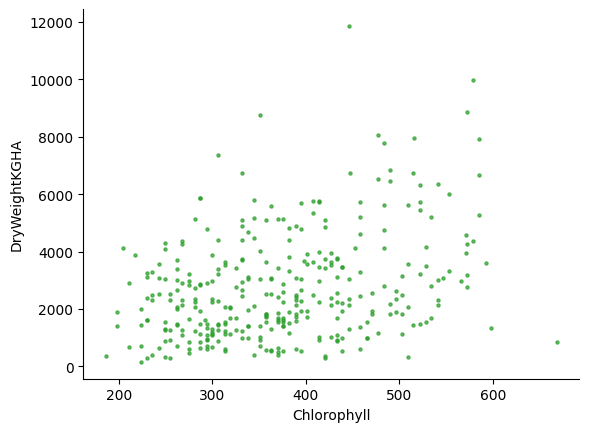

In [4]:
beans.plot(kind='scatter', x='Chlorophyll', y='DryWeightKGHA', s=5, alpha=.7, c="C2")
plt.gca().spines[['top', 'right',]].set_visible(False)

**Cholophyll and dry weight looks like there is likely some relationship**

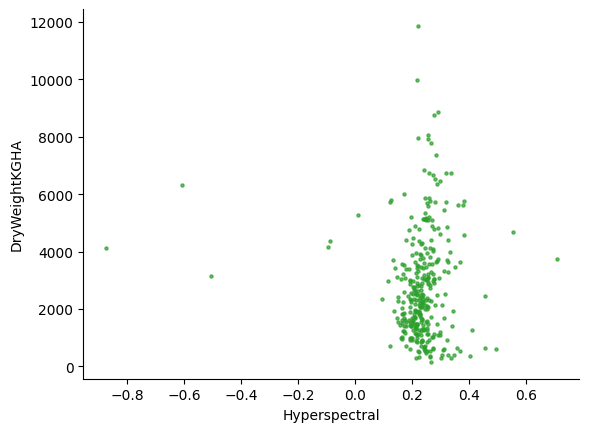

In [5]:
beans.plot(kind='scatter', x='Hyperspectral', y='DryWeightKGHA', s=5, alpha=.7, c="C2")
plt.gca().spines[['top', 'right',]].set_visible(False)

**The hyperspectral value and dry weight looks like maybe a relationship, though it looks weak and there are many outliers**

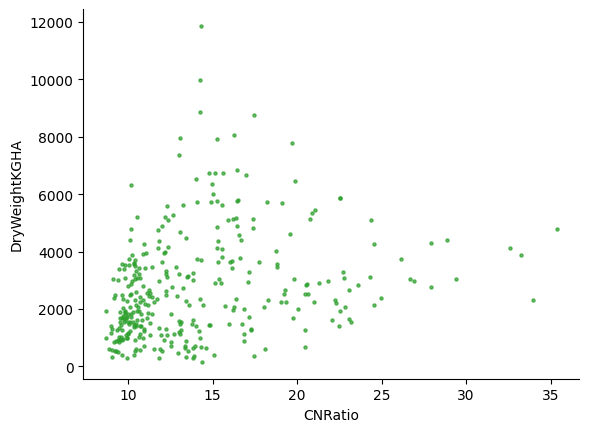

In [6]:
beans.plot(kind='scatter', x='CNRatio', y='DryWeightKGHA', s=5, alpha=.7, c="C2")
plt.gca().spines[['top', 'right',]].set_visible(False)

**Carbon/Nitrogren Ratio and dry weight looks like a decent relationship**

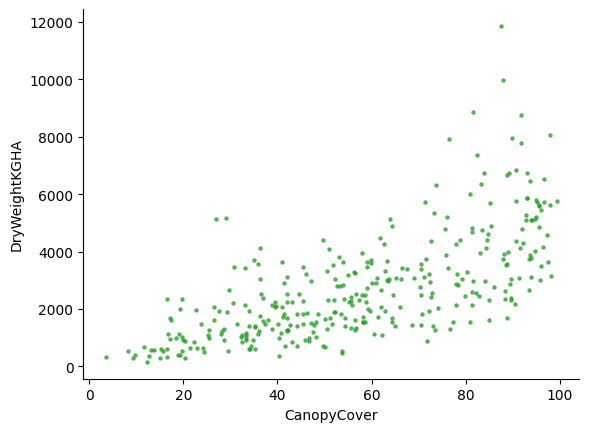

In [7]:
beans.plot(kind='scatter', x='CanopyCover', y='DryWeightKGHA', s=5, alpha=.7, c="C2")
plt.gca().spines[['top', 'right',]].set_visible(False)

**Canopy cover and dry weight look like they have a strong relationship, this make sense, the more plant you see the more plant there is.**

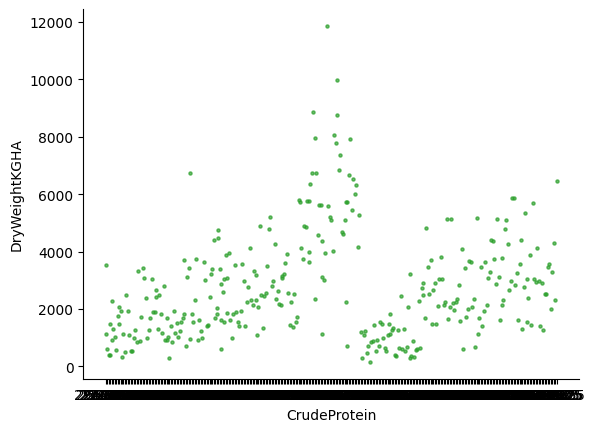

In [8]:
beans.plot(kind='scatter', x='CrudeProtein', y='DryWeightKGHA', s=5, alpha=.7, c="C2")
plt.gca().spines[['top', 'right',]].set_visible(False)

**For crude protein I saw two main groups which I suspect might have been due to the species, but there was definitely a relationship. This was the same for all the detergent fiber values.**

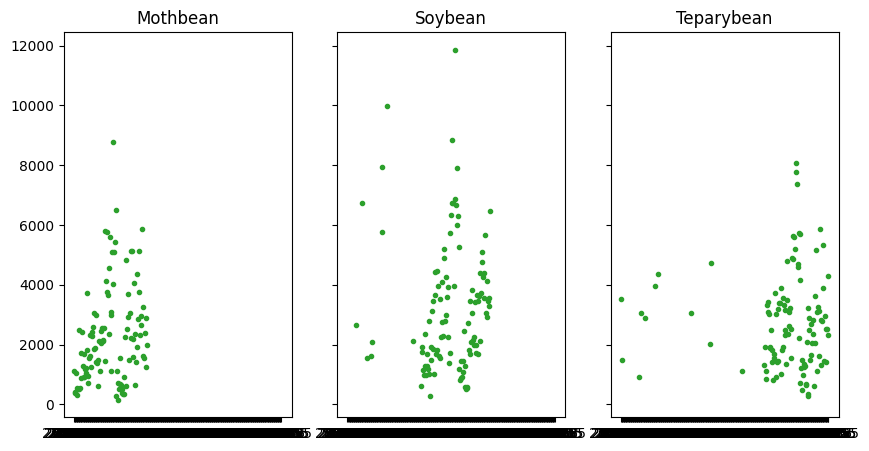

In [9]:
_, ax = plt.subplots(1, 3, figsize=(10, 5), sharex=True, sharey=True)
ax = np.ravel(ax)

#make a scatter plot for each position
for i, p in enumerate(bean_codes):
    ax[i].scatter(
        x = beans.query('Species == @p')['CrudeProtein'],
        y =  beans.query('Species == @p')['DryWeightKGHA'],
        c="C2",
        marker=".")
    ax[i].set_title(f"{p}")

**These all looked like they had different plots, so I think that the species is likely a factor in dry weight, as we think crude protein likely affects dry weight from earlier**

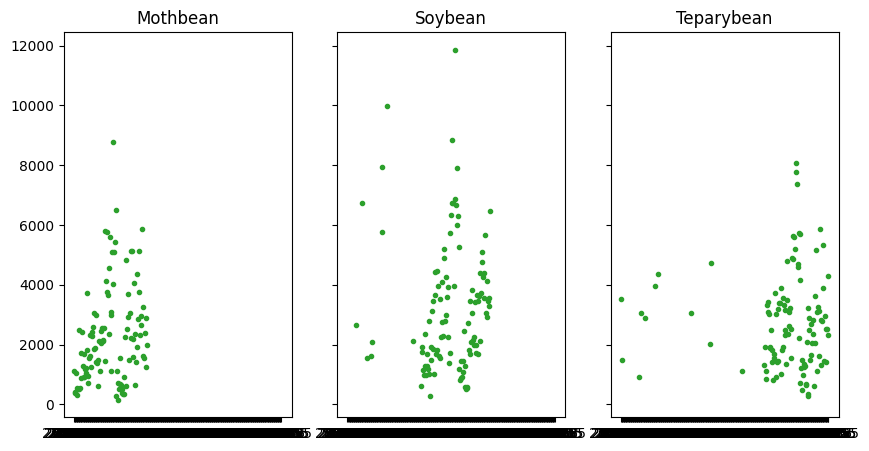

In [10]:
_, ax = plt.subplots(1, 3, figsize=(10, 5), sharex=True, sharey=True)
ax = np.ravel(ax)

#make a scatter plot for each position
for i, p in enumerate(bean_codes):
    ax[i].scatter(
        x = beans.query('Species == @p')['CrudeProtein'],
        y =  beans.query('Species == @p')['DryWeightKGHA'],
        c="C2",
        marker=".")
    ax[i].set_title(f"{p}")

**These all seem fairly similar, but do follow a distinct trend**

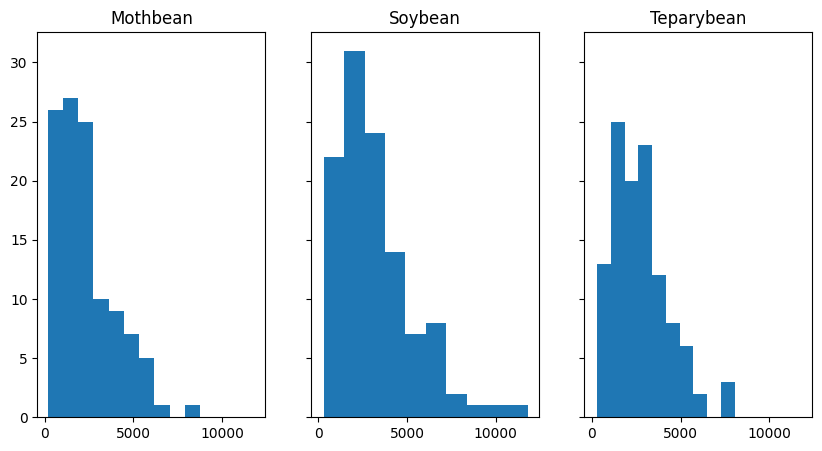

In [11]:
_, ax = plt.subplots(1, 3, figsize=(10, 5), sharex=True, sharey=True)
ax = np.ravel(ax)

#make a scatter plot for each position
for i, p in enumerate(bean_codes):
    ax[i].hist(
        beans.query('Species == @p')['DryWeightKGHA'],
        bins=10)
    ax[i].set_title(f"{p}")

**All 3 species have slightly diffent distributions for dry weight, again likely showing some relation between species and yield.**

# Causal model DAG

**Based on what I saw in the plots and my knowledge of plants, I put together a DAG of how I thought the variables interacted. I put this DAG together in Google Drawings**

<img src ='https://drive.google.com/uc?id=1ZYrtXMUn0mdZnmYiGJ9AdtoQnnNjCTAw'>



**Ultimately I ended up with Species as my starting nodes because nothing else can effect it. I think that the species will affect most of the physical characteristics of the plant, ultimately affecting dry weight, or yield**

# Models

**To start I thought I would try the most simple model with just one predictor. I went with Carbon/Nitrogen ratio as it seemed like it could be a straightfoward relationship.**

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


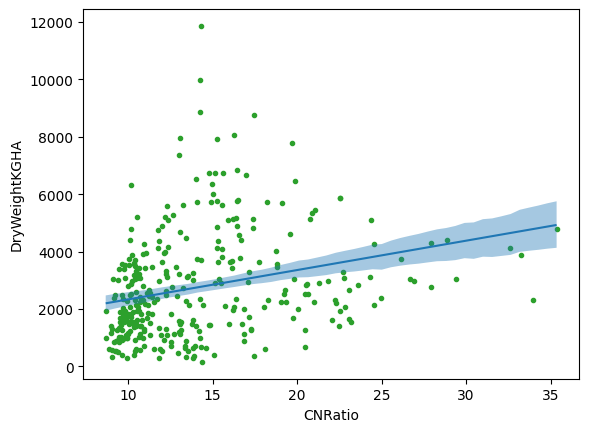

In [12]:
model_beans1 = bmb.Model("DryWeightKGHA ~ CNRatio", beans)
idata_beans1 = model_beans1.fit(idata_kwargs={"log_likelihood":True})

bmb.interpret.plot_predictions(model_beans1, idata_beans1, "CNRatio")
plt.plot(beans.CNRatio, beans.DryWeightKGHA, "C2.", zorder=-3)

In [13]:
model_beans1

       Formula: DryWeightKGHA ~ CNRatio
        Family: gaussian
          Link: mu = identity
  Observations: 334
        Priors: 
    target = mu
        Common-level effects
            Intercept ~ Normal(mu: 2755.7717, sigma: 14085.9709)
            CNRatio ~ Normal(mu: 0.0, sigma: 943.5348)
        
        Auxiliary parameters
            sigma ~ HalfStudentT(nu: 4.0, sigma: 1853.3157)
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()

**The model chose two Normal distributions, and produced a pretty clear positive relationship. I think a Normal distribution makes sense here as it tends to explain a lot of natural phenomena, and I do not know much more about plants.**

**For my next model I will factor in the Species in a heirarchical model, and still use the CNR Ratio as the main predictor.**

Output()

Output()

ERROR:pymc.stats.convergence:There were 370 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='CNRatio', ylabel='DryWeightKGHA'>], dtype=object))

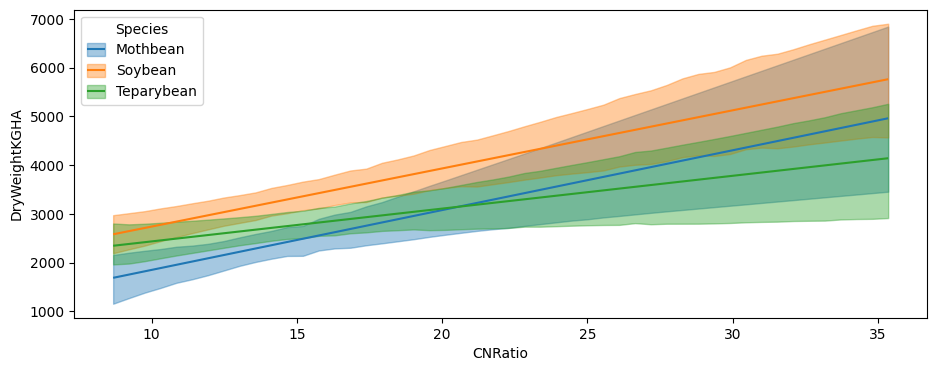

In [14]:
model_beans2 = bmb.Model("`DryWeightKGHA` ~ (`CNRatio`|Species)", data=beans)
idata_beans2 = model_beans2.fit(idata_kwargs={'log_likelihood': True})

bmb.interpret.plot_predictions(model_beans2,
                               idata_beans2,
                               ["CNRatio","Species"],
                               fig_kwargs={"figsize":(11, 4)})

**This model provides some more insight, the different species do seem to have slightly different slopes. For the next model I added in Crude Protein.**

Output()

Output()

ERROR:pymc.stats.convergence:There were 97 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='CNRatio', ylabel='DryWeightKGHA'>], dtype=object))

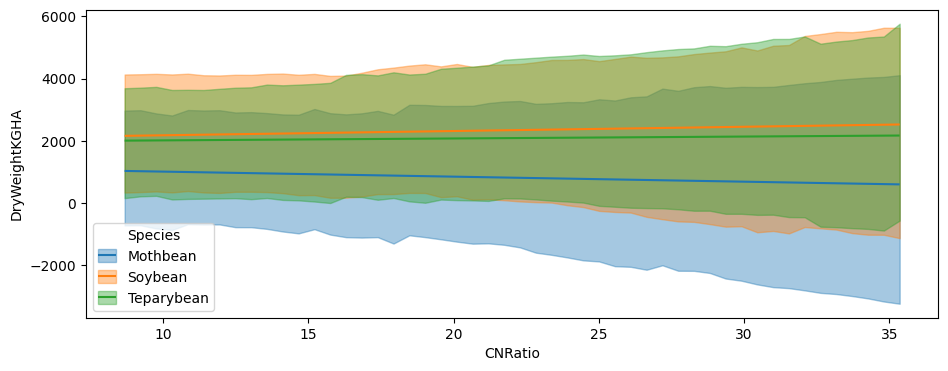

In [22]:
model_beans3 = bmb.Model("`DryWeightKGHA` ~ `CrudeProtein` + (`CNRatio`|Species)", data=beans)
idata_beans3 = model_beans3.fit(idata_kwargs={'log_likelihood': True})

bmb.interpret.plot_predictions(model_beans3,
                               idata_beans3,
                               ["CNRatio","Species"],
                               fig_kwargs={"figsize":(11, 4)})

Output()

Output()

ERROR:pymc.stats.convergence:There were 83 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='CNRatio', ylabel='DryWeightKGHA'>], dtype=object))

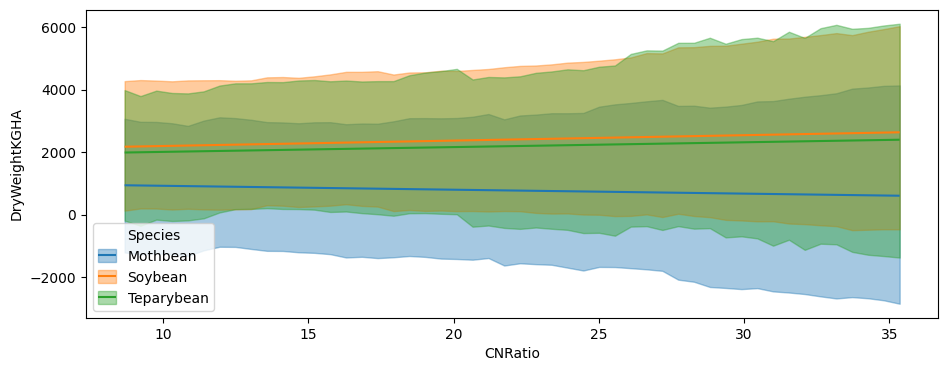

In [24]:
model_beans4 = bmb.Model("`DryWeightKGHA` ~ `CrudeProtein` + `Hyperspectral` + (`CNRatio`|Species)", data=beans)
idata_beans4 = model_beans4.fit(idata_kwargs={'log_likelihood': True})

bmb.interpret.plot_predictions(model_beans4,
                               idata_beans4,
                               ["CNRatio","Species"],
                               fig_kwargs={"figsize":(11, 4)})

Output()

Output()

ERROR:pymc.stats.convergence:There were 193 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='CNRatio', ylabel='DryWeightKGHA'>], dtype=object))

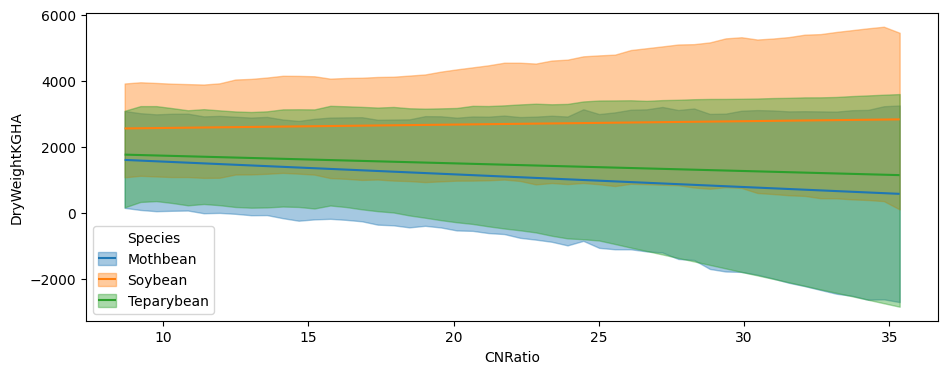

In [26]:
model_beans5 = bmb.Model("`DryWeightKGHA` ~ `CanopyCover` + `Hyperspectral` + `CrudeProtein` + (`CNRatio`|Species)", data=beans)
idata_beans5 = model_beans5.fit(idata_kwargs={'log_likelihood': True})

bmb.interpret.plot_predictions(model_beans5,
                               idata_beans5,
                               ["CNRatio","Species"],
                               fig_kwargs={"figsize":(11, 4)})

Output()

Output()

ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='CNRatio', ylabel='DryWeightKGHA'>], dtype=object))

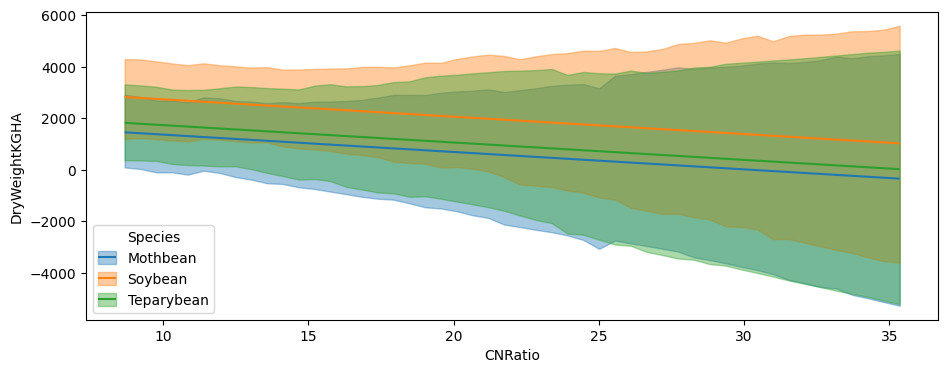

In [27]:
model_beans6 = bmb.Model("DryWeightKGHA ~ CanopyCover + Species + CrudeProtein + CNRatio", beans)
idata_beans6 = model_beans6.fit(idata_kwargs={"log_likelihood":True})


bmb.interpret.plot_predictions(model_beans6,
                               idata_beans6,
                               ["CNRatio","Species"],
                               fig_kwargs={"figsize":(11, 4)})

Output()

Output()

ERROR:pymc.stats.convergence:There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='CNRatio', ylabel='DryWeightKGHA'>], dtype=object))

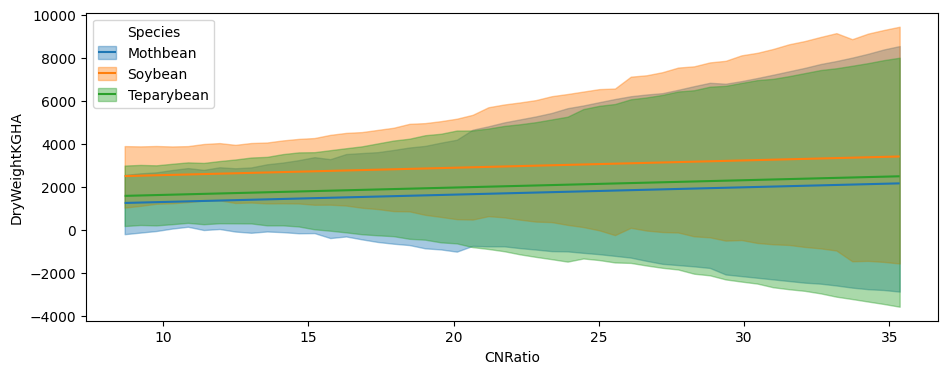

In [30]:
model_beans7 = bmb.Model("DryWeightKGHA ~ CanopyCover + Species + CrudeProtein + CNRatio + Chlorophyll + Hyperspectral", beans)
idata_beans7 = model_beans7.fit(idata_kwargs={"log_likelihood":True})


bmb.interpret.plot_predictions(model_beans7,
                               idata_beans7,
                               ["CNRatio","Species"],
                               fig_kwargs={"figsize":(11, 4)})

Output()

Output()

ERROR:pymc.stats.convergence:There were 123 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 1100x400 with 1 Axes>,
 array([<Axes: xlabel='CNRatio', ylabel='DryWeightKGHA'>], dtype=object))

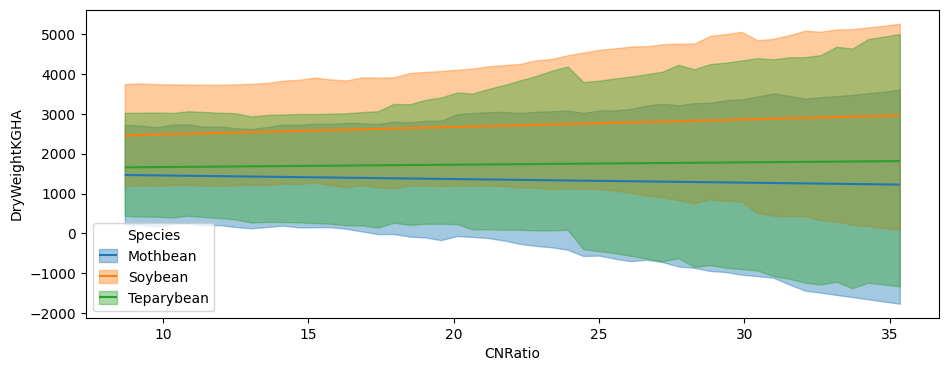

In [33]:
model_beans8 = bmb.Model("DryWeightKGHA ~ CanopyCover + CrudeProtein + Chlorophyll + Hyperspectral + (`CNRatio`|Species)", beans)
idata_beans8 = model_beans8.fit(idata_kwargs={"log_likelihood":True})


bmb.interpret.plot_predictions(model_beans8,
                               idata_beans8,
                               ["CNRatio","Species"],
                               fig_kwargs={"figsize":(11, 4)})

In [34]:
CompareBeans = az.compare({
                          "1- Carbon nitrogen linear":idata_beans1,
                          "2- carbon nitrogen | species":idata_beans2,
                          "3- carbon nitrogen | species, crude protein":idata_beans3,
                          "4- carbon nitrogen | species, crude protein, hyperspectral":idata_beans4,
                          "5- carbon nitrogen | species, crude protein, hyperspectral, CanopyCover":idata_beans5,
                          "6- carbon nitrogen, species, crude protein, CanopyCover":idata_beans6,
                          "7- all":idata_beans7,
                          "8- all with species":idata_beans8
                       })
CompareBeans

/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.70 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/stats/stats.py:795: UserWarning: Estimat

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
2- carbon nitrogen | species,0,-2971.026006,5.871281,0.000000,8.194711e-01,19.429202,0.000000,False,log
1- Carbon nitrogen linear,1,-2977.799629,3.947814,6.773623,0.000000e+00,20.133712,3.734123,False,log
8- all with species,2,-3001.561070,244.818594,30.535064,4.434980e-02,7.917739,20.265578,True,log
7- all,3,-3002.577862,247.258678,31.551856,1.361791e-01,8.171023,20.640082,True,log
"6- carbon nitrogen, species, crude protein, CanopyCover",4,-3022.823540,245.287876,51.797534,1.568614e-09,6.818151,20.235691,True,log
"5- carbon nitrogen | species, crude protein, hyperspectral, CanopyCover",5,-3023.414053,238.441952,52.388047,1.546446e-09,8.128863,20.534282,True,log
"3- carbon nitrogen | species, crude protein",6,-3116.303785,238.020332,145.277779,0.000000e+00,6.026032,19.971198,True,log
"4- carbon nitrogen | species, crude protein, hyperspectral",7,-3134.977457,242.429590,163.951451,0.000000e+00,6.362112,20.119122,True,log


<Axes: title={'center': 'Model comparison\nhigher is better'}, xlabel='elpd_loo (log)', ylabel='ranked models'>

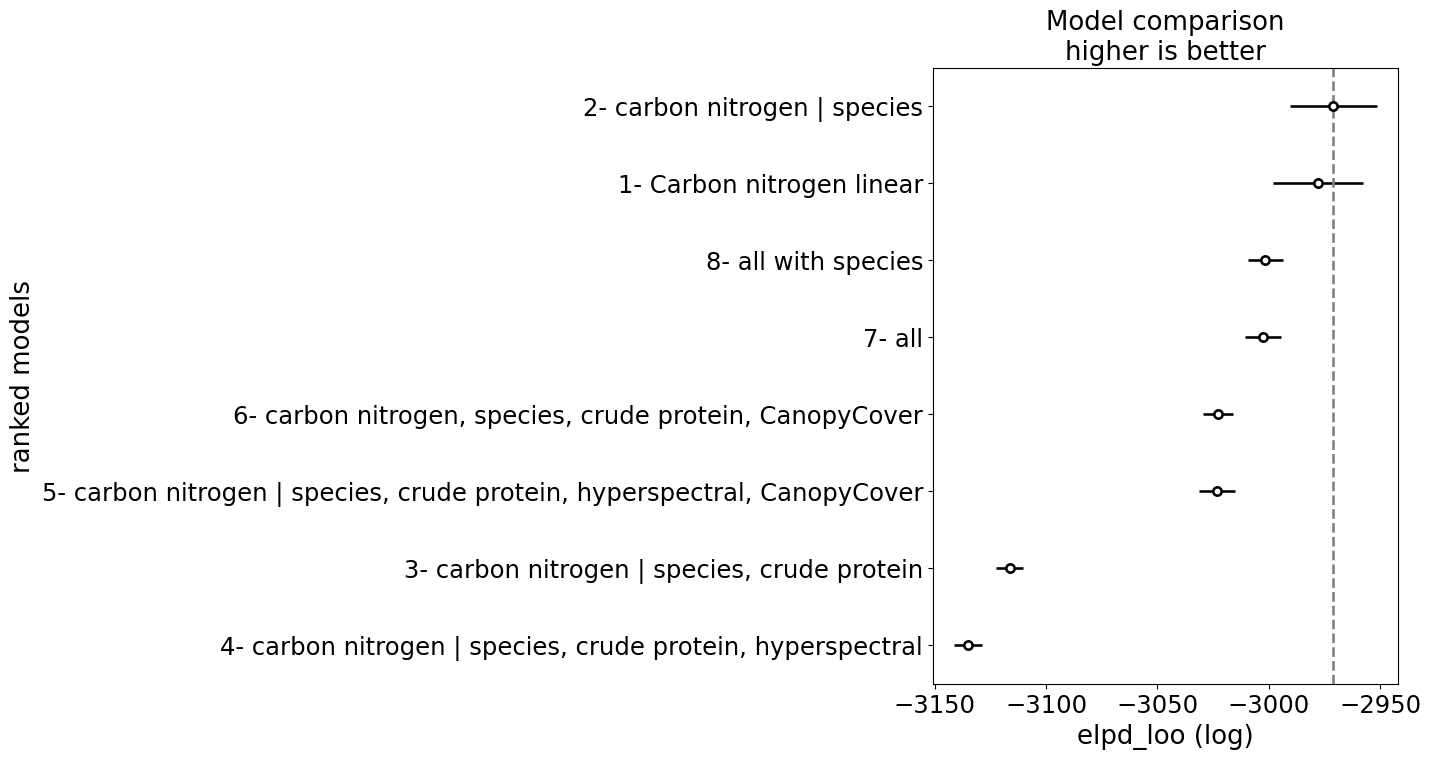

In [38]:
az.plot_compare(CompareBeans)

**The elpd_loo test suggests that the model with the most variables was the most accurate, but almost all my models had a warning, so I will look at the model to see what its predictions were.**

<Axes: xlabel='DryWeightKGHA'>

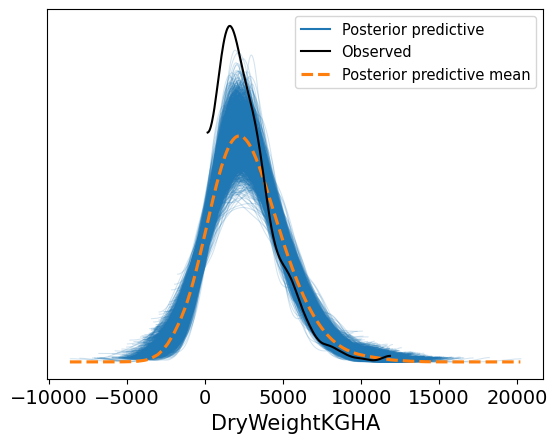

In [43]:
model_beans8.predict(idata_beans8, kind="response")
az.plot_ppc(idata_beans8)

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


(<Figure size 400x200 with 1 Axes>,
 array([<Axes: xlabel='CrudeProtein', ylabel='DryWeightKGHA'>],
       dtype=object))

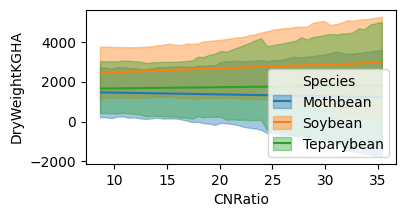

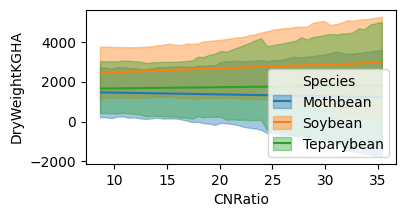

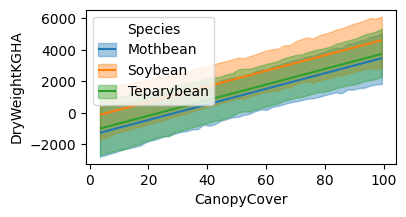

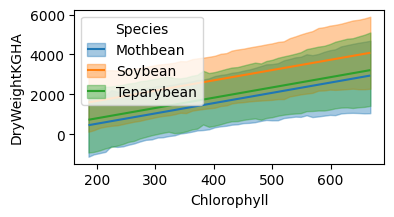

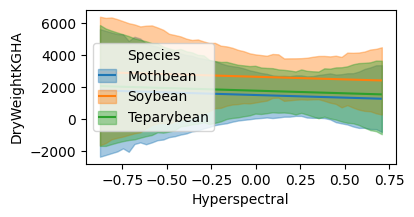

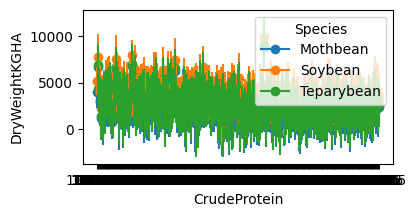

In [57]:
bmb.interpret.plot_predictions(model_beans8,
                               idata_beans8,
                               ["CNRatio","Species"],
                               fig_kwargs={"figsize":(4, 2)})

bmb.interpret.plot_predictions(model_beans8,
                               idata_beans8,
                               ["CNRatio","Species"],
                               fig_kwargs={"figsize":(4, 2)})

bmb.interpret.plot_predictions(model_beans8,
                               idata_beans8,
                               ["CanopyCover","Species"],
                               fig_kwargs={"figsize":(4, 2)})

bmb.interpret.plot_predictions(model_beans8,
                               idata_beans8,
                               ["Chlorophyll","Species"],
                               fig_kwargs={"figsize":(4, 2)})

bmb.interpret.plot_predictions(model_beans8,
                               idata_beans8,
                               ["Hyperspectral","Species"],
                               fig_kwargs={"figsize":(4, 2)})

bmb.interpret.plot_predictions(model_beans8,
                               idata_beans8,
                               ["CrudeProtein","Species"],
                               fig_kwargs={"figsize":(4, 2)})

**Based on these plots, it looks like canopy cover and chlorophyll levels are the most accurate predictors for total yeild. This relationship follows a similar slope for all beans, but with sligtly different total yeilds, as shown in the differnt y intercepts.**